# Processamento

Assume-se Python 3 no sistema Unix, e a preparação é simples

```bash
sudo pip3 install matplotlib scikit-learn
```

## Scipy

O [Scipy](http://www.scipy.org/) fornece ferramentas eficientes para processamento dos dados (usando o [numpy](https://numpy.org/)) nas aplicações científicas mais comuns.

In [1]:
# Setup
import numpy as np


np.random.seed(42)


def ruido(size):
    return np.random.normal(size=size)

Uma das possibilidades é a [otimização](https://docs.scipy.org/doc/scipy/reference/optimize.html) de valores para aproximação de funções.

Amplitude real / estimada: 3.00 / 2.81
Frequência real / estimada: 1.50 / 1.50


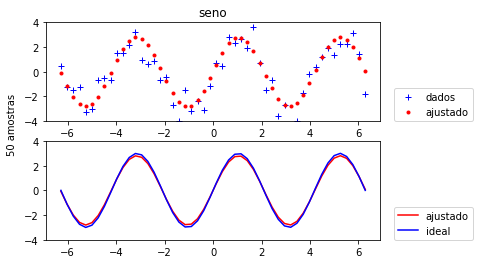

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import optimize


def seno(x, amplitude, frequencia):
    return amplitude * np.sin(frequencia * x)


amplitude, frequencia = 3, 1.5
amostras = 50

x = np.linspace(-2 * np.pi, 2 * np.pi, num=amostras)
# "dados reais" geralmente têm ruído
y = seno(x, amplitude, frequencia) + ruido(amostras)    

params, covariance = optimize.curve_fit(seno, x, y)

print(f'Amplitude real / estimada: {amplitude:.2f} / {params[0]:.2f}')
print(f'Frequência real / estimada: {frequencia:.2f} / {params[1]:.2f}')

# Visualmente
plt.subplot(2, 1, 1)
plt.ylim(-4, 4)
plt.plot(x, y, 'b+', linestyle='', label='dados')
plt.plot(x, seno(x, *params), 'r.', label='ajustado')
plt.legend(loc=(1.04,0))
plt.title(f'seno')

plt.subplot(2, 1, 2)
plt.ylim(-4, 4)
plt.plot(x, seno(x, *params), 'r', label='ajustado')
plt.plot(x, seno(x, amplitude, frequencia), 'b', label='ideal')
plt.legend(loc=(1.04,0))
plt.text(-8.5, 3, f'{amostras} amostras', rotation='vertical')

plt.show()

## scikit-learn

O [scikit-learn](https://scikit-learn.org/stable/) é uma das bibliotecas mais utilizadas para aplicações de aprendizagem de máquina. Geralmente, deseja-se reconhecer um padrão a partir de dados. Por exemplo, pode-se tentar aplicar [regressão](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html) dos dados para tentar inferir a função `seno`.

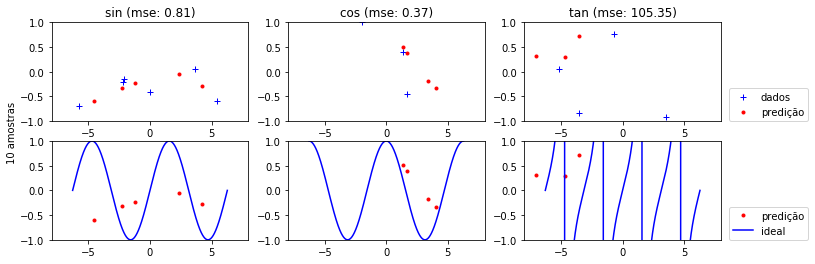

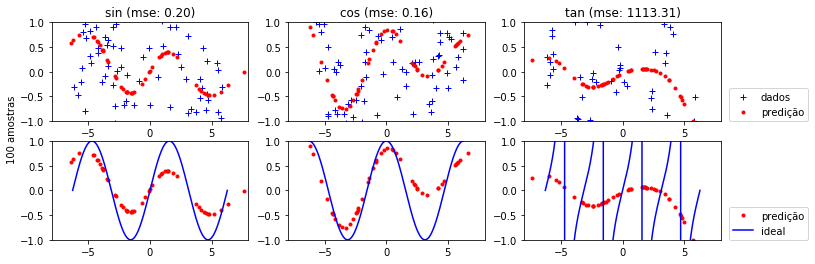

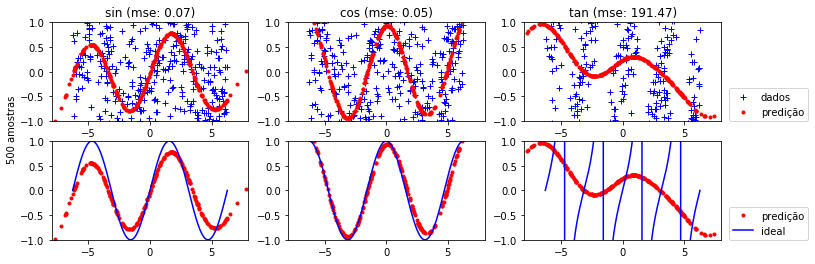

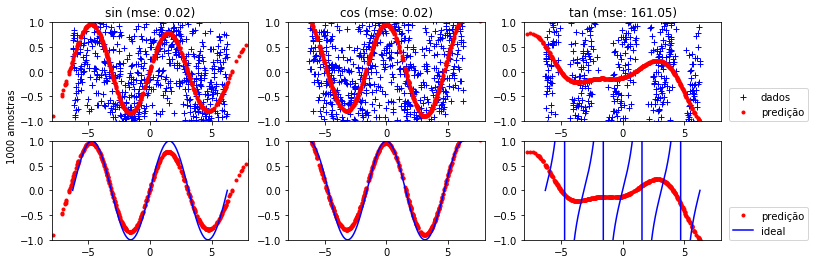

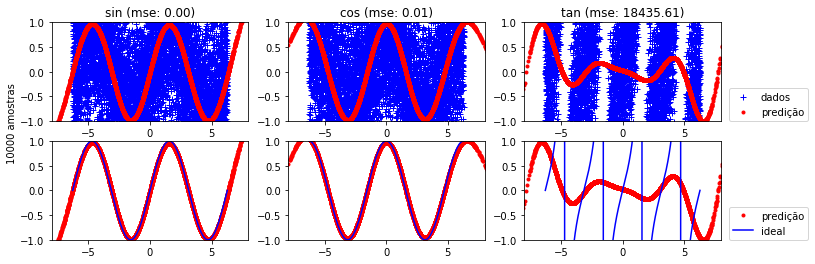

In [3]:
from pandas import DataFrame as DF
from sklearn import svm
from sklearn import metrics

num_samples = [10, 100, 500, 1000, 10000]

functions = [np.sin, np.cos, np.tan]
X = np.linspace(-2 * np.pi, 2 * np.pi, num=num_samples[-1])
y = [f(X) for f in functions]
        
ncols = len(functions)
plt_width = 4 # inches


clf = svm.SVR()

for samples in num_samples:
    plt.figure(figsize=(ncols * plt_width, plt_width))

    for index in range(ncols):
        f = functions[index]
        
        train_X = np.random.choice(X, size=samples, replace=False)
        # "dados reais" geralmente têm ruído
        train_y = f(train_X) + ruido(samples)
        test_X = DF(np.random.choice(X, size=(samples // 2), replace=False) + ruido(samples // 2))   
        
        clf.fit(DF(train_X), train_y)
        prediction = clf.predict(test_X)
        
        mse = metrics.mean_squared_error(prediction, f(test_X))
        
        # Visualmente
        data_plt = plt.subplot(2, ncols, index + 1, title=f'{f.__name__} (mse: {mse:.2f})')
        plt.xlim(-8, 8)
        plt.ylim(-1, 1)
        plt.plot(train_X, train_y, 'b+', label='dados')
        plt.plot(test_X, prediction, 'r.', label='predição')

        ideal_plt = plt.subplot(2, ncols, index + ncols + 1)
        plt.xlim(-8, 8)
        plt.ylim(-1, 1)
        plt.plot(test_X, prediction, 'r.', label='predição')
        plt.plot(X, y[index], 'b', label='ideal')
    
    data_plt.legend(loc=(1.04,0))
    ideal_plt.legend(loc=(1.04,0))
    ideal_plt.text(-50, .6, f'{samples} amostras', rotation='vertical')

    plt.show()

Outra possibilidade é a [classificação](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). Por exemplo, identificar se uma pessoa sobreviveria a um [desastre](https://www.kaggle.com/c/titanic).

## Outros Recursos

* [Machine Learning in Python](https://www.springboard.com/resources/learning-paths/machine-learning-python/)